In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#import datetime as dt
from dateutil.parser import parse
from numpy import inf
import matplotlib.pyplot as plt
import seaborn as sns
#from scipy.optimize import newton
#from scipy.special import psi, polygamma
from scipy.stats import norm, kde, kstest
from numpy import inf,linspace
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('google_drive_nanreplaced.csv')

In [3]:
data= df[['time','1day_active_users']]
data1=df['1day_active_users']
df['1day_active_users'].count_values()

AttributeError: 'Series' object has no attribute 'count_values'

Sampling distribution from the original data

In [ ]:
users_sample= np.random.choice(a= data1,size= 300)
print(users_sample.mean())

In [ ]:
data1.mean()-users_sample.mean()

In [ ]:
pd.DataFrame(data1).hist(bins=58,figsize=(9,9), ec='black')

In [4]:
pd.DataFrame(users_sample).hist(bins=58,figsize=(9,9), ec='black')

NameError: name 'users_sample' is not defined

Applying Central limit theorem

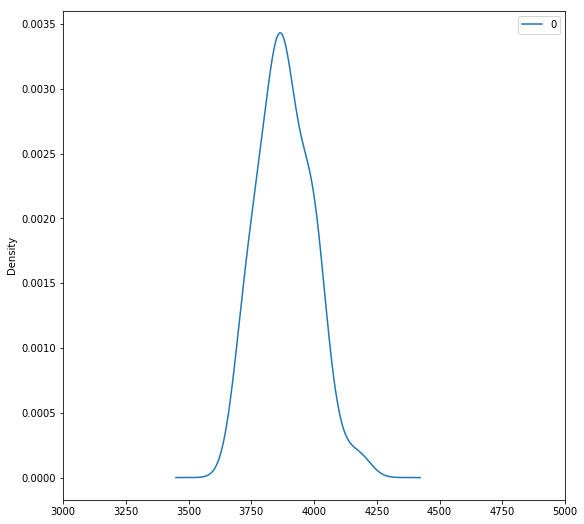

In [5]:
#np.random.seed(10)

point_estimates = []         # Make empty list to hold point estimates

for x in range(50):         # Generate 200 samples
    sample = np.random.choice(a= data1, size=300)
    point_estimates.append(sample.mean())
    
pd.DataFrame(point_estimates).plot(kind="density",  # Plot sample mean density
                                   figsize=(9,9),
                                   xlim=(3000,5000))   

In [6]:
data1.mean()- np.array(point_estimates).mean()

4.66619481864609

Confidence Interval

In [7]:
np.random.seed(10)

sample_size = 300
sample = np.random.choice(a= data1, size = sample_size)
sample_mean = sample.mean()

z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*

print("z-critical value:")              # Check the z-critical value
print(z_critical)                        

users_stdev = data1.std()  # Get the population standard deviation

margin_of_error = z_critical * (users_stdev/math.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Sample Mean:")
print(sample_mean)

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.959963984540054
Sample Mean:
3963.313009499136
Confidence interval:
(3733.0658995520157, 4193.560119446257)


Creating Many samples so that we have many confidence intervals.

In [8]:
np.random.seed(12)

sample_size = 300

intervals = []
sample_means = []

for sample in range(25):
    sample = np.random.choice(a= data1, size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

    z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*         

    users_stdev = data1.std()  # Get the population standard deviation

    stats.norm.ppf(q = 0.025)

    margin_of_error = z_critical * (users_stdev/math.sqrt(sample_size))

    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)

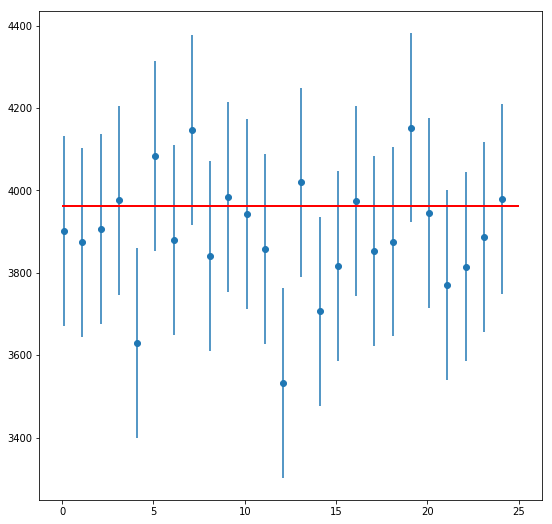

In [9]:
plt.figure(figsize=(9,9))

plt.errorbar(x=np.arange(0.1, 25, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=25,
           y=3963, 
           linewidth=2.0,
           color="red")

T -critical value

In [10]:
np.random.seed(10)

sample_size = 300
sample = np.random.choice(a= data1, size = sample_size)
sample_mean = sample.mean()

t_critical = stats.t.ppf(q = 0.975, df=24)  # Get the t-critical value*

print("t-critical value:")                  # Check the t-critical value
print(t_critical)                        

sample_stdev = sample.std()    # Get the sample standard deviation

sigma = sample_stdev/math.sqrt(sample_size)  # Standard deviation estimate
margin_of_error = t_critical * sigma

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

t-critical value:
2.0638985616280205
Confidence interval:
(3717.6073233157736, 4209.018695682499)


In [11]:
# Check the difference between critical values with a sample size of 1000
             
stats.t.ppf(q=0.975, df= 300) - stats.norm.ppf(0.975)  

0.007939026720730213

In [12]:
stats.t.interval(alpha = 0.95,              # Confidence level
                 df= 24,                    # Degrees of freedom
                 loc = sample_mean,         # Sample mean
                 scale = sigma)             # Standard deviation estimate

(3717.6073233157736, 4209.018695682499)

Point estimates

Point estimate proportion 

In [13]:
z_critical = stats.norm.ppf(0.975)      # Record z-critical value

p = 0.192                              # Point estimate of proportion

n = 300                                # Sample size

margin_of_error = z_critical * math.sqrt((p*(1-p))/n)

confidence_interval = (p - margin_of_error,  # Calculate the the interval
                       p + margin_of_error) 

confidence_interval

(0.1474298846158399, 0.23657011538416012)

In [14]:
stats.norm.interval(alpha = 0.95,    # Confidence level             
                   loc =  0.192,     # Point estimate of proportion
                   scale = math.sqrt((p*(1-p))/n))  # Scaling factor

(0.1474298846158399, 0.23657011538416012)

Covariance and correlation
Calcualting correlation and covariance for 1day_active_users and 30day_active_users

In [15]:
import os
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [16]:
data30= df['30day_active_users']

In [17]:
np.cov(data1, data30)[0,1]

3012902.180435127

In [18]:
print('Covariance of X and Y: %.2f'%np.cov(data1, data30)[0, 1])
print('Correlation of X and Y: %.2f'%np.corrcoef(data1, data30)[0, 1])

Covariance of X and Y: 3012902.18
Correlation of X and Y: 0.45


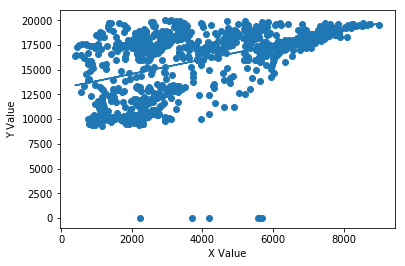

Correlation of X and Y: 0.45


In [19]:
X = data1
Y = data30

m, b = np.polyfit(X, Y, 1)

plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.plot(X, m*X + b, '-')
plt.show()
print('Correlation of X and Y: %.2f'%np.corrcoef(X, Y)[0, 1])

The correlation value is 0.45 which shows, it is not a good correlation between 1day_active_users and 30day_active_users